# Linear regression
#### ordinary least squares 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3

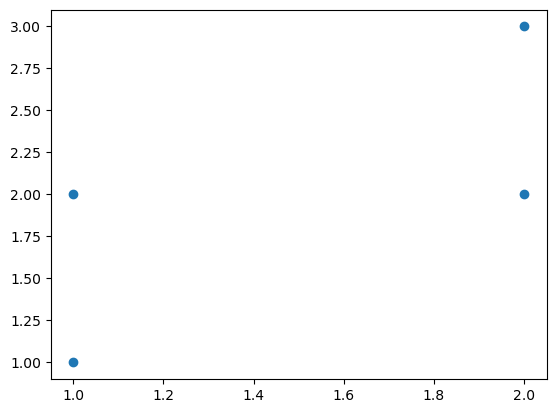

In [2]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [3]:
reg = LinearRegression().fit(X, y)
# Returns the coefficient of determination of the prediction - r2
reg.score(X, y)

1.0

In [4]:
reg.coef_

array([1., 2.])

In [5]:
reg.intercept_

3.0000000000000018

In [6]:
reg.predict([[3, 5]])

array([16.])

## Diabetes dataset
### EDA

In [7]:
# Load the diabetes dataset
diabetes = load_diabetes()

In [8]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [9]:
diabetes.data.shape, diabetes.target.shape

((442, 10), (442,))

In [10]:
import pandas as pd
df = load_diabetes(as_frame=True)

In [11]:
df.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [12]:
print(df.frame.isna().any().any())

False


In [13]:
df.frame.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


        age age in years
        sex
        bmi body mass index
        bp average blood pressure
        s1 tc, total serum cholesterol
        s2 ldl, low-density lipoproteins
        s3 hdl, high-density lipoproteins
        s4 tch, total cholesterol / HDL
        s5 ltg, possibly log of serum triglycerides level
        s6 glu, blood sugar level



In [14]:
# default scaled = True
df.frame.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [15]:
df_unscaled = load_diabetes(scaled=False, as_frame=True)
df_unscaled.frame.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [16]:
(df.frame[df.frame.columns] == 0).sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [17]:
df.frame['target'].head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

# Linear regression using one feature 

In [18]:
X, y = diabetes.data, diabetes.target
X = X[:, np.newaxis, 2]

In [19]:
# Split the targets into training/testing sets
X_train = X[:-20]
X_test = X[-20:]
y_train = y[:-20]
y_test = y[-20:]

In [20]:
# Create linear regression object
lm = LinearRegression()
# Train the model using the training sets
lm.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = lm.predict(X_test)

In [21]:
print("Coefficients: \n", lm.coef_)
print("Intercept: \n", lm.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("r2: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [938.23786125]
Intercept: 
 152.91886182616113
Mean squared error: 2548.07
r2: 0.47


In [22]:
""" helper functions for model evaluation"""
# coef_ is only available when using a linear kernel and intercept_ is not avaliable for trees
def eval_non_linear(X_test, y_test, reg):
    print(reg.__class__.__name__,'model evaluation:')
    y_preds = reg.predict(X_test)
    print('R2 %.3f'% r2_score(y_test, y_preds))
    ###print('Adj R2 %.3f'%(1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))))
    print('MAE %.3f'% mean_absolute_error(y_test, y_preds))
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    print('MSE %.3f'% mse)
    print('RMSE %.3f'% rmse)
    
def evaluate(X_test, y_test, reg):
    print("Coefficients:", reg.coef_)
    print("Intercept:", reg.intercept_)
    eval_non_linear(X_test, y_test, reg)

## MAE
#### + Simple and easy to interpret
#### + comparatively robust to the outliers
#### - can not be used as a loss function in many cases (not differentiable at all the points)
## MSE 
#### + is differentiable at all the points - it can be used as a loss function
#### - difficult to interpret the result
#### - not robust to the outliers
## RMSE
#### + easy to interpret
#### - not robust to outliers
## R2
#### R2 = 0 -> model is just as good as the mean line. R2 = 1 -> model fits every data point and is not making any error. R2 < 0 -> model is worst than the mean line (model is garbage).
#### + explains how much % of data variance model captures
#### - as the number of input features increases, the R2 score tends to increase accordingly or it will remain the same but will never decrease, even though the input features are not important to our model
## Adj R2
#### + explains how much % of data variance model captures
#### + increasing features doesn't mean score will not decrease

In [23]:
evaluate(X_test, y_test, lm)

Coefficients: [938.23786125]
Intercept: 152.91886182616113
LinearRegression model evaluation:
R2 0.473
MAE 41.227
MSE 2548.072
RMSE 50.478


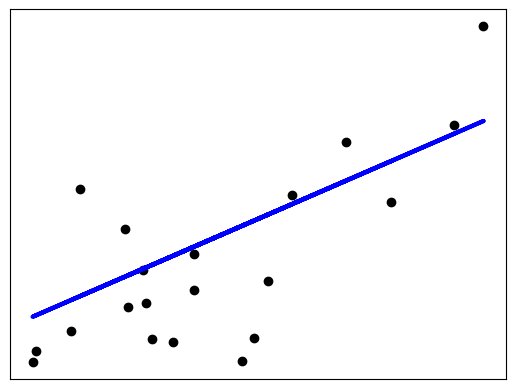

In [24]:
# Plot outputs
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

#### using all features

In [25]:
X, y = diabetes.data, diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
evaluate(X_test, y_test, model)

Coefficients: [  29.25401303 -261.7064691   546.29972304  388.39834056 -901.95966819
  506.76324136  121.15435079  288.03526689  659.26895081   41.37670105]
Intercept: 151.00821291456543
LinearRegression model evaluation:
R2 0.477
MAE 41.919
MSE 2821.751
RMSE 53.120


# Lasso

In [28]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso()

In [29]:
lasso_reg.fit(X_train, y_train)

Lasso()

In [30]:
# Evaluate - pay attention to coefficients
evaluate(X_test, y_test, lasso_reg)

Coefficients: [  0.          -0.         443.7033885   51.60109433   0.
   0.          -0.           0.         201.96647823   0.        ]
Intercept: 152.16591884353062
Lasso model evaluation:
R2 0.362
MAE 49.208
MSE 3444.671
RMSE 58.691


In [56]:
from sklearn.model_selection import GridSearchCV
# grid search for best alpha
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
print(scores, '\n', max(scores))

[0.45229937 0.45230493 0.45231216 0.45232147 0.45233339 0.45234846
 0.45237168 0.45242583 0.45248648 0.45253855 0.45259719 0.45265692
 0.45277351 0.45288234 0.45304986 0.45313556 0.45291377 0.45235143
 0.45211751 0.45190771 0.45170715 0.4512466  0.4502604  0.44889059
 0.44761363 0.4464129  0.44499435 0.44121039 0.43525794 0.42491775] 
 0.45313556449111614


# Ridge

In [31]:
from sklearn.linear_model import Ridge
# alpha=1.0
ridge_reg = Ridge()

In [32]:
ridge_reg.fit(X_train, y_train)

Ridge()

In [33]:
# Evaluate - pay attention to coefficients
evaluate(X_test, y_test, ridge_reg)

Coefficients: [  45.05421022  -71.94739737  280.71625182  195.21266175   -2.22930269
  -17.54079744 -148.68886188  120.46723979  198.61440137  106.93469215]
Intercept: 151.86746422977902
Ridge model evaluation:
R2 0.423
MAE 45.464
MSE 3112.966
RMSE 55.794


In [34]:
# alpha = 0.1
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(X_train, y_train)
# pay attention to coef
evaluate(X_test, y_test, ridge_reg)

Coefficients: [  39.6635292  -213.84688049  505.91429153  341.71447431 -108.80630119
  -70.57580966 -211.90657957  160.19354049  332.77354206   77.68045166]
Intercept: 151.0525340484514
Ridge model evaluation:
R2 0.480
MAE 41.851
MSE 2805.401
RMSE 52.966


##### you can also try out combining Lasso and Ridge using Elastic Net -> https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

# SGD

In [35]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(alpha=0.0001, max_iter=10000)

sgd.fit(X_train, y_train)

SGDRegressor(max_iter=10000)

In [36]:
# Evaluate - pay attention to coef
evaluate(X_test, y_test, sgd)

Coefficients: [  45.67913061 -186.30149322  486.56321857  327.37995587  -65.22357073
  -90.30403852 -227.433742    150.65325248  312.4826035   119.01633586]
Intercept: [150.96507932]
SGDRegressor model evaluation:
R2 0.480
MAE 41.875
MSE 2807.744
RMSE 52.988


In [37]:
# with scaled features
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
reg = make_pipeline(StandardScaler(), SGDRegressor())
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [38]:
# Evaluate
#reg.named_steps
evaluate(X_test, y_test, reg['sgdregressor'])

Coefficients: [  1.75380981 -12.06393497  27.06465804  18.3714325   -8.08955096
  -3.07596529 -10.20923145   8.09397481  18.00740339   2.487245  ]
Intercept: [153.91701672]
SGDRegressor model evaluation:
R2 0.042
MAE 62.637
MSE 5173.848
RMSE 71.929


# SVM

In [39]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=10.0, epsilon=0.2)
svr.fit(X_train, y_train)

SVR(C=10.0, epsilon=0.2)

In [40]:
eval_non_linear(X_test, y_test, svr)

SVR model evaluation:
R2 0.499
MAE 41.359
MSE 2704.731
RMSE 52.007


# Decision Trees

In [41]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 100, min_samples_leaf=10)
tree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=100, min_samples_leaf=10)

In [42]:
eval_non_linear(X_test, y_test, tree)

DecisionTreeRegressor model evaluation:
R2 0.282
MAE 49.529
MSE 3875.182
RMSE 62.251


### Decison Tree regressor grid search

In [43]:
params = {
    'max_depth': [5, 10, 12, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [2, 6, 10, 14]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), params, cv=5)


grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10, 12, 15],
                         'min_samples_leaf': [2, 6, 10, 14],
                         'min_samples_split': [2, 5, 10, 15]})

In [44]:
# get best params 
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 14, 'min_samples_split': 2}


In [45]:
tree_gs = grid_search.best_estimator_
tree_gs.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=14)

In [46]:
eval_non_linear(X_test, y_test, tree_gs)

DecisionTreeRegressor model evaluation:
R2 0.385
MAE 46.322
MSE 3321.414
RMSE 57.632


# Ensemble
# Voting Regressor
#### averages the individual predictions to form a final prediction.

In [47]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor

reg1 = RandomForestRegressor(n_estimators=50)
reg2 = DecisionTreeRegressor(max_depth= 5, min_samples_leaf= 14, min_samples_split= 2)
reg3 = SGDRegressor(max_iter=10000)

In [48]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor([('rf', reg1), ('dt', reg2), ('sqd', reg3)], verbose=True)
vr.fit(X_train, y_train)

[Voting] ....................... (1 of 3) Processing rf, total=   0.1s
[Voting] ....................... (2 of 3) Processing dt, total=   0.0s
[Voting] ...................... (3 of 3) Processing sqd, total=   0.1s


VotingRegressor(estimators=[('rf', RandomForestRegressor(n_estimators=50)),
                            ('dt',
                             DecisionTreeRegressor(max_depth=5,
                                                   min_samples_leaf=14)),
                            ('sqd', SGDRegressor(max_iter=10000))],
                verbose=True)

In [49]:
eval_non_linear(X_test, y_test, vr)

VotingRegressor model evaluation:
R2 0.471
MAE 42.870
MSE 2856.184
RMSE 53.443


In [50]:
# check performance for each regressor:
reg1.fit(X_train, y_train)
reg2.fit(X_train, y_train)
reg3.fit(X_train, y_train)

SGDRegressor(max_iter=10000)

In [51]:
regs = [reg1, reg2, reg3, vr]
for reg in regs:
    eval_non_linear(X_test, y_test, reg)

RandomForestRegressor model evaluation:
R2 0.444
MAE 43.826
MSE 3000.335
RMSE 54.775
DecisionTreeRegressor model evaluation:
R2 0.385
MAE 46.322
MSE 3321.414
RMSE 57.632
SGDRegressor model evaluation:
R2 0.480
MAE 41.869
MSE 2807.259
RMSE 52.984
VotingRegressor model evaluation:
R2 0.471
MAE 42.870
MSE 2856.184
RMSE 53.443


# Boosting

In [52]:
from sklearn.ensemble import AdaBoostRegressor
# experiment with different learning_rate and n_estimator hyperparameters, observe how it affects metrics
ada_reg = AdaBoostRegressor(estimator = DecisionTreeRegressor(max_depth = 2), n_estimators=100, learning_rate=0.9)
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=2),
                  learning_rate=0.9, n_estimators=100)

In [53]:
eval_non_linear(X_test, y_test, ada_reg)

AdaBoostRegressor model evaluation:
R2 0.462
MAE 43.730
MSE 2903.639
RMSE 53.885
